In [ ]:
# Paso 1: Instalar todas las dependencias necesarias
!pip install ultralytics opencv-python-headless numpy matplotlib torch

# Paso 2: Reiniciar el entorno de ejecución (solo es necesario una vez)
import os
os.kill(os.getpid(), 9)

  Using cached ultralytics-8.3.168-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Saving image.jpg to image (1).jpg


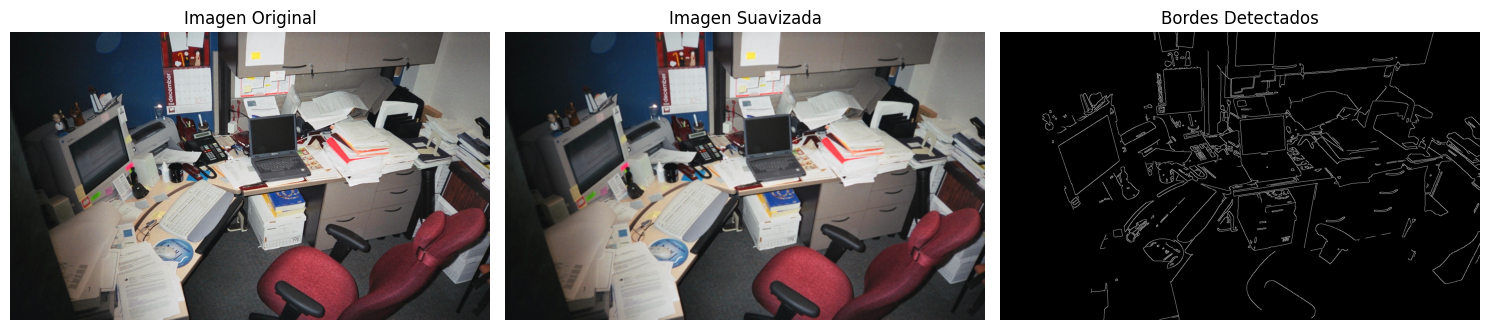

100%|██████████| 6.25M/6.25M [00:00<00:00, 76.5MB/s]



0: 384x640 1 bottle, 1 cup, 2 chairs, 1 laptop, 3 keyboards, 3 books, 324.5ms
Speed: 13.5ms preprocess, 324.5ms inference, 35.5ms postprocess per image at shape (1, 3, 384, 640)


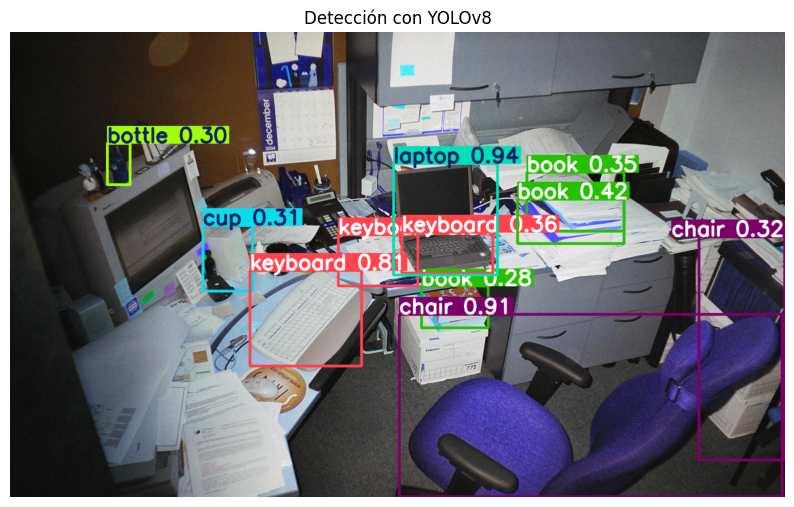

In [1]:

# Después de que se reinicie el entorno, ejecuta esto en una nueva celda:

import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch
from ultralytics import YOLO

def procesar_imagen(ruta_imagen):
    # Cargar la imagen original
    img_original = cv2.imread(ruta_imagen)
    if img_original is None:
        print(f"Error: No se pudo cargar la imagen en {ruta_imagen}")
        return None

    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

    # Aplicar suavizado Gaussiano
    img_suavizada = cv2.GaussianBlur(img_original_rgb, (5, 5), 0)

    # Aplicar detección de bordes con Canny
    img_gris = cv2.cvtColor(img_suavizada, cv2.COLOR_RGB2GRAY)
    bordes = cv2.Canny(img_gris, 100, 200)

    # Mostrar las tres etapas
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img_original_rgb)
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img_suavizada)
    plt.title('Imagen Suavizada')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(bordes, cmap='gray')
    plt.title('Bordes Detectados')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return img_original_rgb

def detectar_objetos_yolo(img):
    # Cargar modelo YOLOv8 preentrenado
    model = YOLO('yolov8n.pt')  # Esto descargará automáticamente el modelo

    # Realizar detección
    results = model(img)

    # Mostrar resultados
    for r in results:
        im_array = r.plot()  # Dibuja bounding boxes y etiquetas
        plt.figure(figsize=(10, 10))
        plt.imshow(im_array[..., ::-1])
        plt.title('Detección con YOLOv8')
        plt.axis('off')
        plt.show()

# Paso 3: Subir la imagen y procesarla
from google.colab import files

# Subir archivo
uploaded = files.upload()

# Obtener nombre del archivo subido
nombre_imagen = next(iter(uploaded))

# Procesar imagen
img_procesada = procesar_imagen(nombre_imagen)

if img_procesada is not None:
    # Detectar objetos con YOLO
    detectar_objetos_yolo(img_procesada)